In [1]:
#Q2
%pylab inline
from datetime import date
from matplotlib import mlab
arr=genfromtxt("AllStations_temperature_h.txt")
n=len(arr[0,0:])
for i in range(n):
    if arr[0,i]==236.6910 and arr[1,i]==48.4623: 
        m=i
        print m
    else:
        pass
data=arr[2:,m]

Populating the interactive namespace from numpy and matplotlib
33


the average temperature of the winter is: 6.86911172161


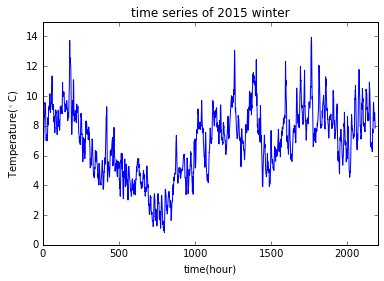

In [2]:
day1=date.toordinal(date(2015,12,1))+366 # python decimal time string shift of 366 days
day2=date.toordinal(date(2016,3,1))+366 
tt_start=arr[2,0]                        # python array starts from 0
dayhr=24                                 # length of a in hour resolution
day1_start=int(2+(day1-tt_start)*dayhr)  # find the position of 2015/12/1,0:00 in arr                                 
day2_start=int(2+(day2-tt_start)*dayhr)  # find the position of 2016/3/1,0:00 in arr

data1=data[day1_start:day2_start]     
print 'the average temperature of the winter is:',mean(data1) 

x_day=linspace(0,len(data1)-1,len(data1))                 
figure(1)                                    
plot(x_day,data1,'blue')
axis([0,2200,0,15])
xlabel('time(hour)')
ylabel('Temperature($^\circ$C)')
title('time series of 2015 winter')

the average temperature of the summer is: 17.4893931159


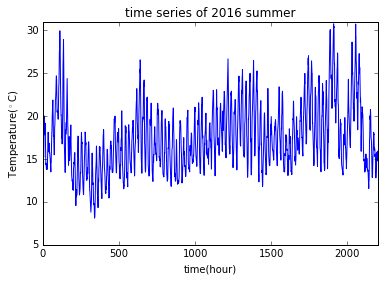

In [3]:
day1=date.toordinal(date(2016,6,1))+366 # python decimal time string shift of 366 days
day2=date.toordinal(date(2016,9,1))+366 
tt_start=arr[2,0]                       # python array starts from 0
dayhr=24                                # length of a in hour resolution
day1_start=int(2+(day1-tt_start)*dayhr) # find the position of 2016/6/1,0:00 in arr                                 
day2_start=int(2+(day2-tt_start)*dayhr) # find the position of 2016/9/1,0:00 in arr
           
data2=data[day1_start:day2_start]     # python array starts from 0;
print 'the average temperature of the summer is:',mean(data2) 

x_day=linspace(0,len(data2)-1,len(data2))                 
figure(1)                                    
plot(x_day,data2,'blue')
axis([0,2200,5,31])
xlabel('time(hour)')
ylabel('Temperature($^\circ$C)')
title('time series of 2016 summer') 

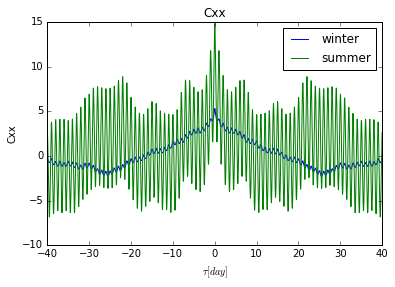

In [4]:
xx1=data1
xx2=data2
laghr=24*40
lags = range(-laghr,laghr)
cxx1=0.*np.array(lags)
cxx2=0.*np.array(lags)

x1=xx1-mean(xx1)
x2=xx2-mean(xx2)
     
for ind,tau in enumerate(lags):
    if tau<0:
        cxx1[ind]=np.mean(x1[:tau]*(xx1[-tau:]-mean(xx1[-tau:])))
        cxx2[ind]=np.mean(x2[:tau]*(xx2[-tau:]-mean(xx2[-tau:])))

    elif tau==0:
        cxx1[ind]=np.mean(x1*x1)
        cxx2[ind]=np.mean(x2*x2)
 
    else:
        cxx1[ind]=np.mean(x1[:-tau]*(xx1[tau:]-mean(xx1[tau:])))
        cxx2[ind]=np.mean(x2[:-tau]*(xx2[tau:]-mean(xx2[tau:])))
td=linspace(-40,40,len(lags))
plot(td,cxx1,label='winter',color="blue")
plot(td,cxx2,label='summer',color="green")
xlabel(r'$\tau [day]$')
ylabel('Cxx')
legend(loc='best')
title('Cxx')

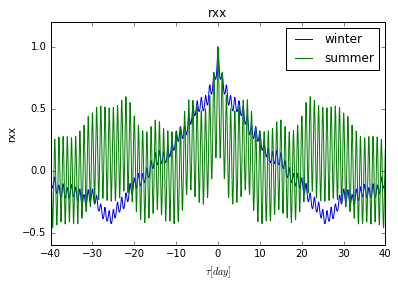

In [6]:
figure(1)
y1=cxx1/np.var(xx1)
plot(td,y1,label='winter',color="blue")
xlabel(r'$\tau [hr]$')
ylabel('rxx')
title('rxx')
legend(loc='best')

y2=cxx2/np.var(xx2)
plot(td,y2,label='summer',color="green")
xlabel(r'$\tau [day]$')
ylabel('rxx')
title('rxx')
legend(loc='best')

In [7]:
arr1=zeros((len(td),2))
arr1[:,0]=td
arr1[:,1]=y1

arr2=zeros((len(td),2))
arr2[:,0]=td
arr2[:,1]=y2

print 'decorrelation time scales of winter are:'
for i in range(0,len(td)):
    if -0.002<arr1[i,1]-1/e<0.002:
        print arr1[i,0]
print 'decorrelation time scales of summe are:'

for i in range(0,len(td)):
    if -0.001<arr2[i,1]-1/e<0.0001:
        print arr2[i,0]

decorrelation time scales of winter are:
-8.02501302762
8.06670140698
decorrelation time scales of summe are:
-5.81552892131
5.85721730068


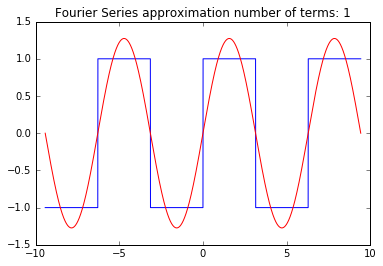

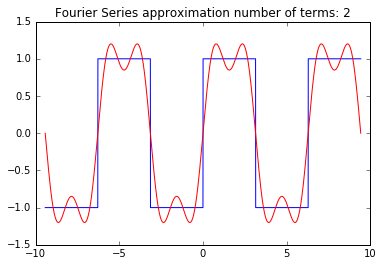

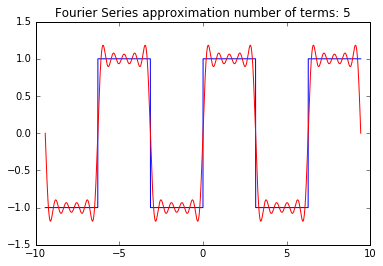

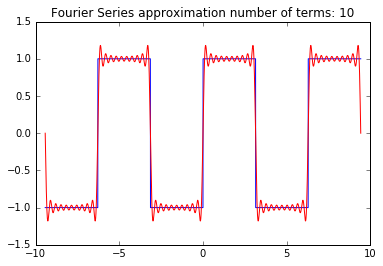

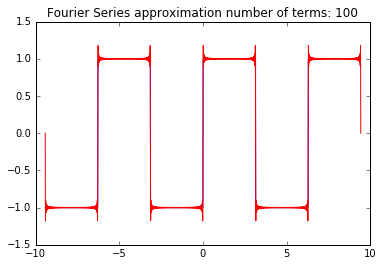

In [16]:
x_ = np.linspace(-3*pi,3*pi,10000)
T = 2*np.pi
term = array([1,2,5,10,100])
def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1
    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums

for j in range(0,len(term)):
    t=term[j]
    figure(j)
    y = []
    f = []
    for i in x_:
        y.append(squareWave(i))
        f.append(fourierSeries(2*t,i))
    plt.plot(x_,y,color="blue")
    plt.plot(x_,f,color="red")
    plt.title("Fourier Series approximation number of terms: "+str(term[j]))
